In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
rides = pd.read_csv('bike-share-dataset/day.csv')
videos = pd.read_csv('online-video-dataset/transcoding_mesurment.tsv',sep='\t')

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
videos.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


## Q1

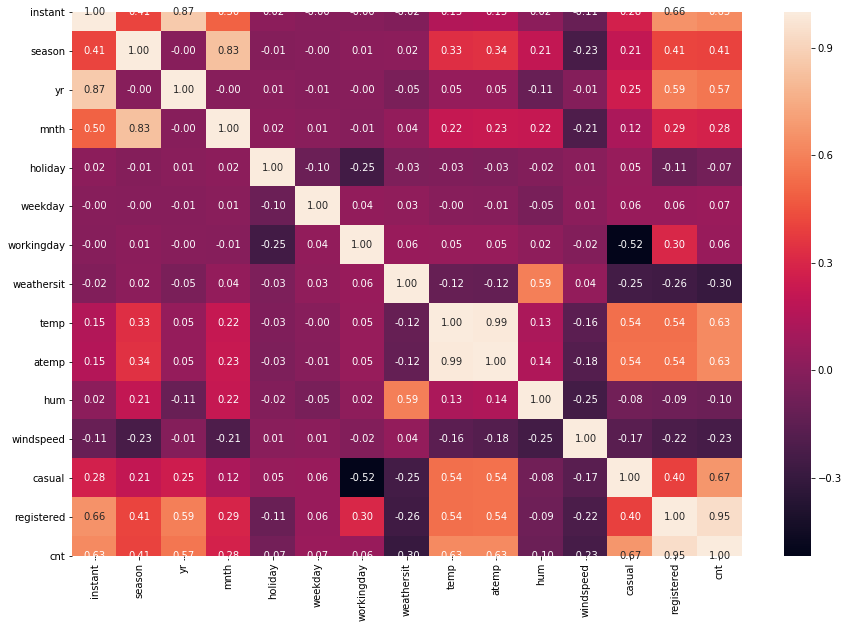

In [5]:
rides_corr = rides.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(rides_corr,annot=True,fmt='.2f')

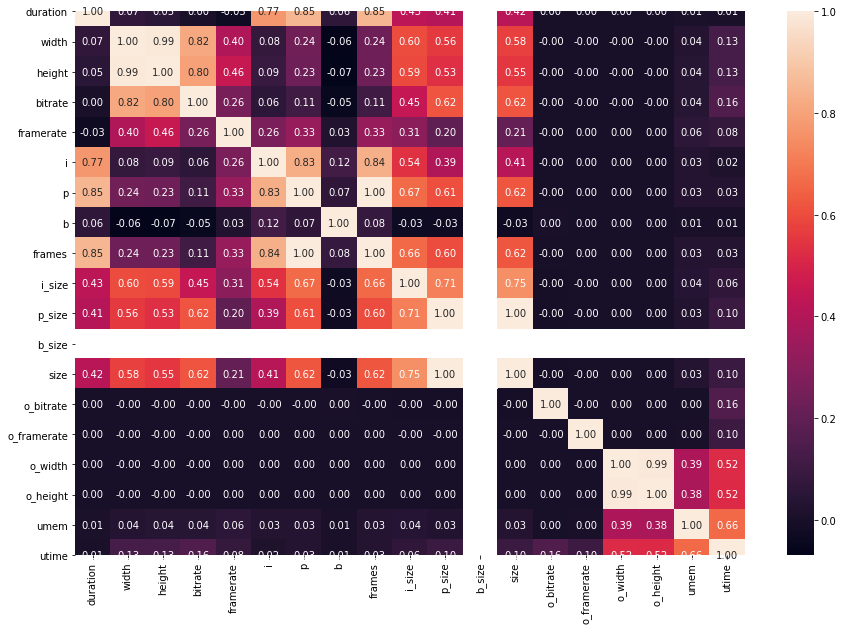

In [6]:
videos_corr = videos.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(videos_corr,annot=True,fmt='.2f')

The three target variables for the bike sharing dataset are count of casual users, count of registered users and total number of users. All these three target variables have high positive correlation with the normalized temperature and feeling normalized temperature. Which means higher the temperature on a particular day, more the number of users that day. 

## Q2

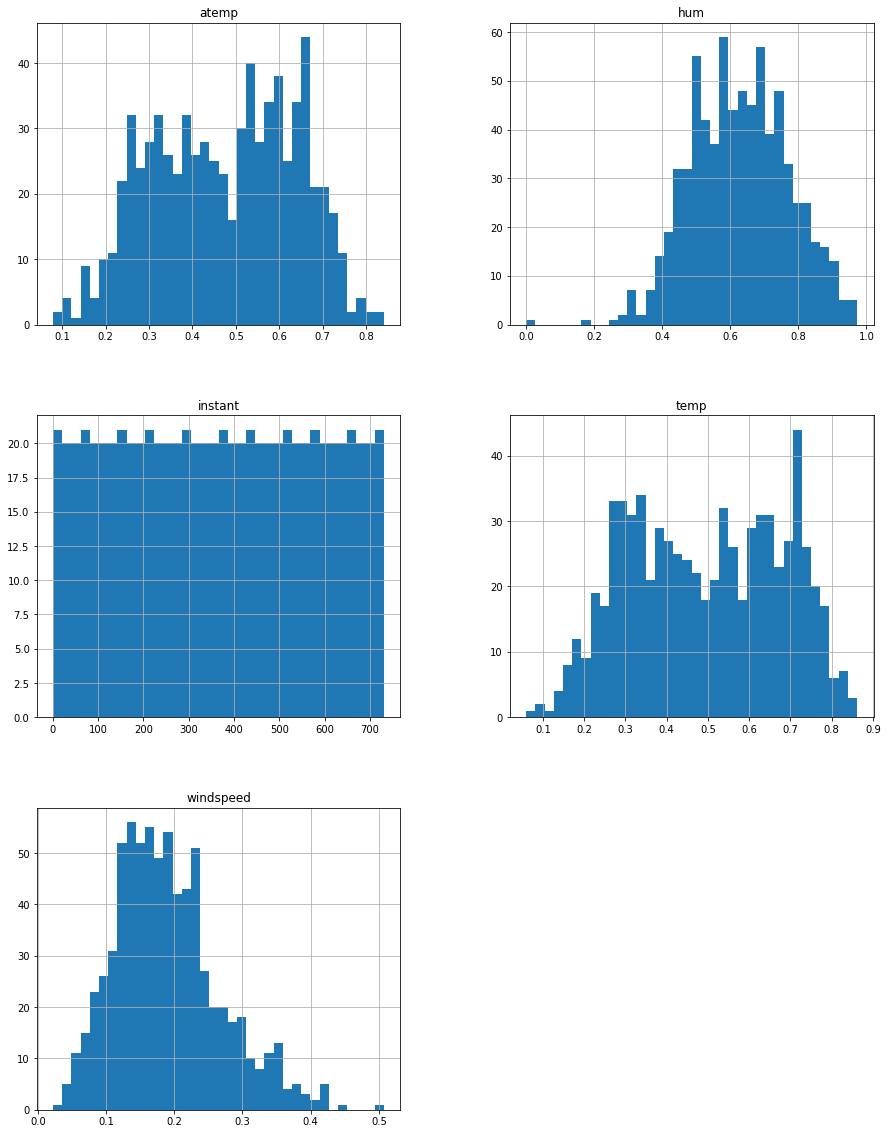

In [7]:
rides['dteday'] = pd.to_datetime(rides.dteday)

# categorical variables
rides['season'] = rides.season.astype('category')
rides['holiday'] = rides.holiday.astype('category')
rides['weekday'] = rides.weekday.astype('category')
rides['weathersit'] = rides.weathersit.astype('category')
rides['workingday'] = rides.workingday.astype('category')
rides['mnth'] = rides.mnth.astype('category')
rides['yr'] = rides.yr.astype('category')

numerical_features_rides = ['instant','temp','atemp','hum','windspeed']

hist = rides[numerical_features_rides].hist(bins=36,figsize=(15,20))

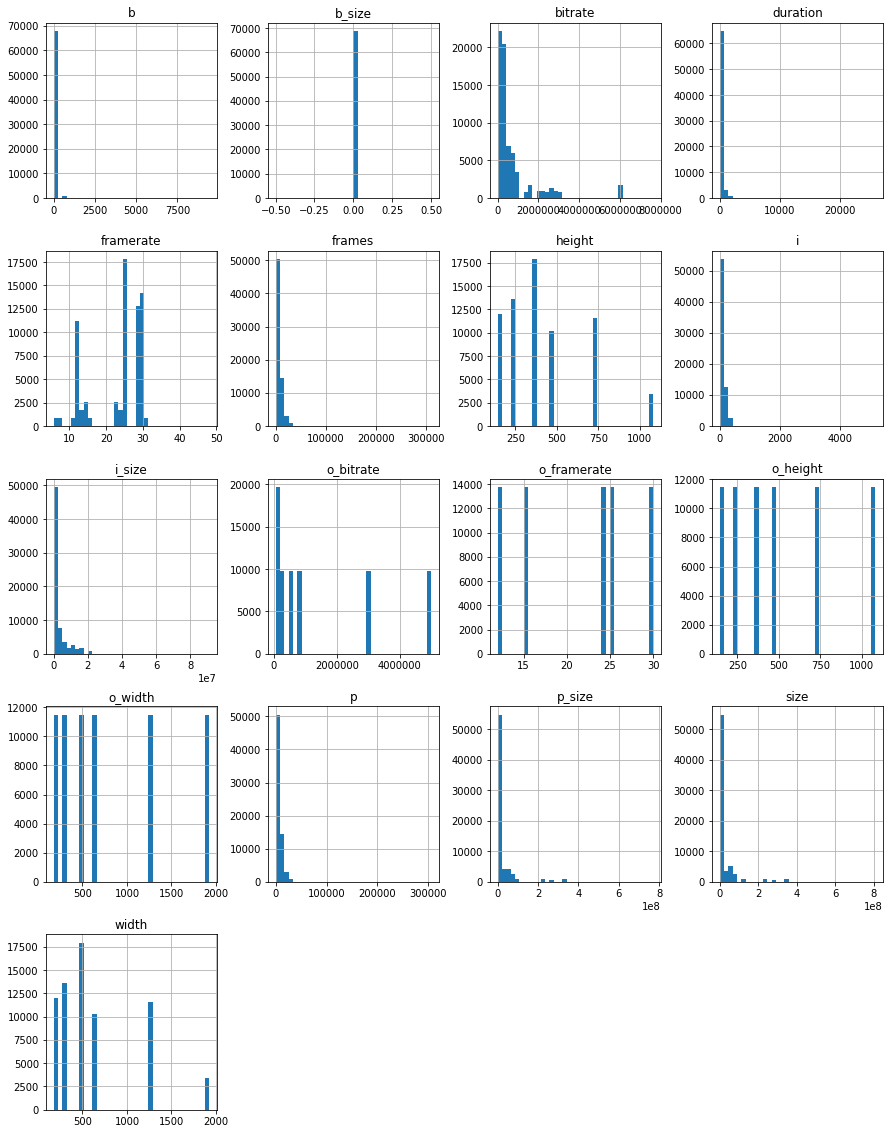

In [8]:
videos['codec'] = videos.codec.astype('category')
videos['o_codec'] = videos.o_codec.astype('category')

numerical_features_videos = videos.columns.drop(['codec','o_codec','utime','umem'])
hist = videos[numerical_features_videos].hist(bins=36,figsize=(15,20))

If the distribution of a feature has high skewness, we can use some transformation like a logarithmic transformation to reduce the skewness of the feature

## Q3

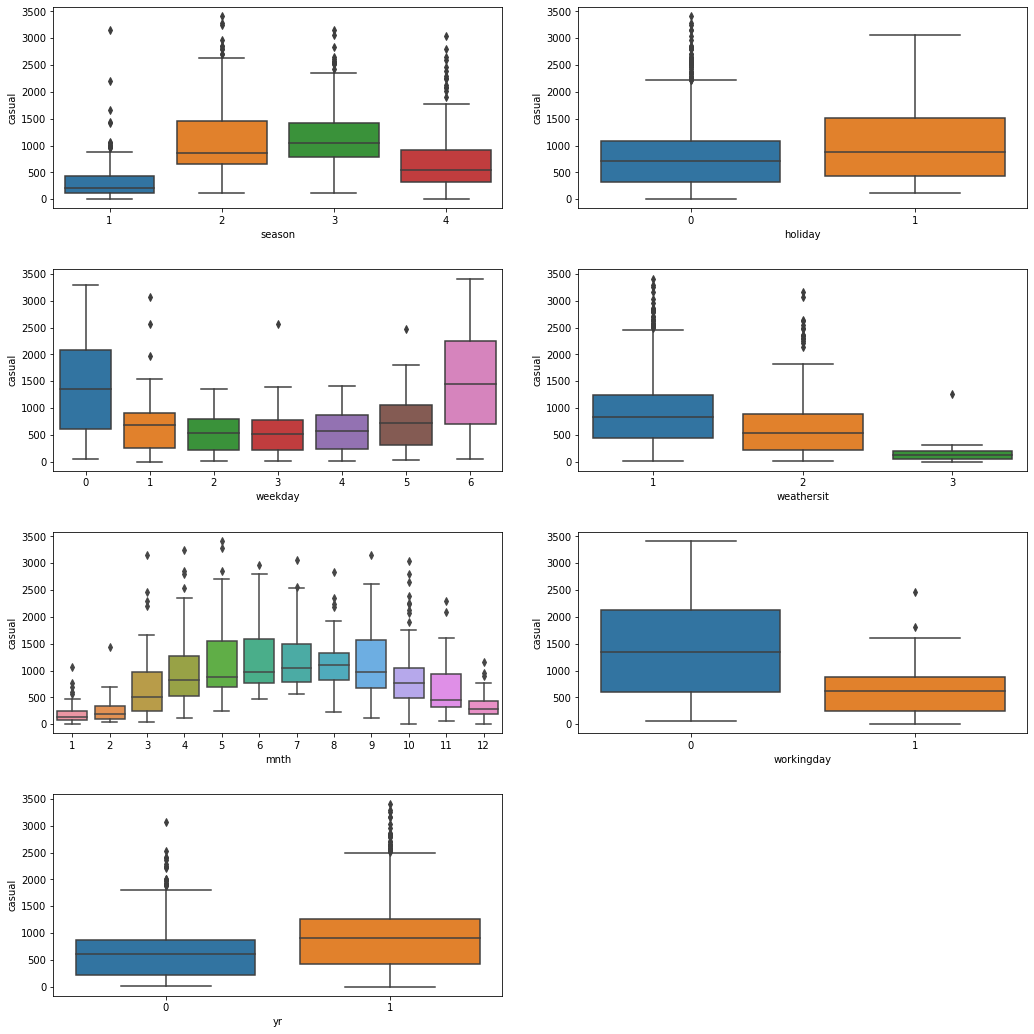

In [9]:
#categorical features vs casual
categorical_features_rides = ['season','holiday','weekday','weathersit','mnth','workingday','yr']
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['casual',col]],x=col,y='casual',ax=ax)
    
fig.tight_layout(pad=3.0)

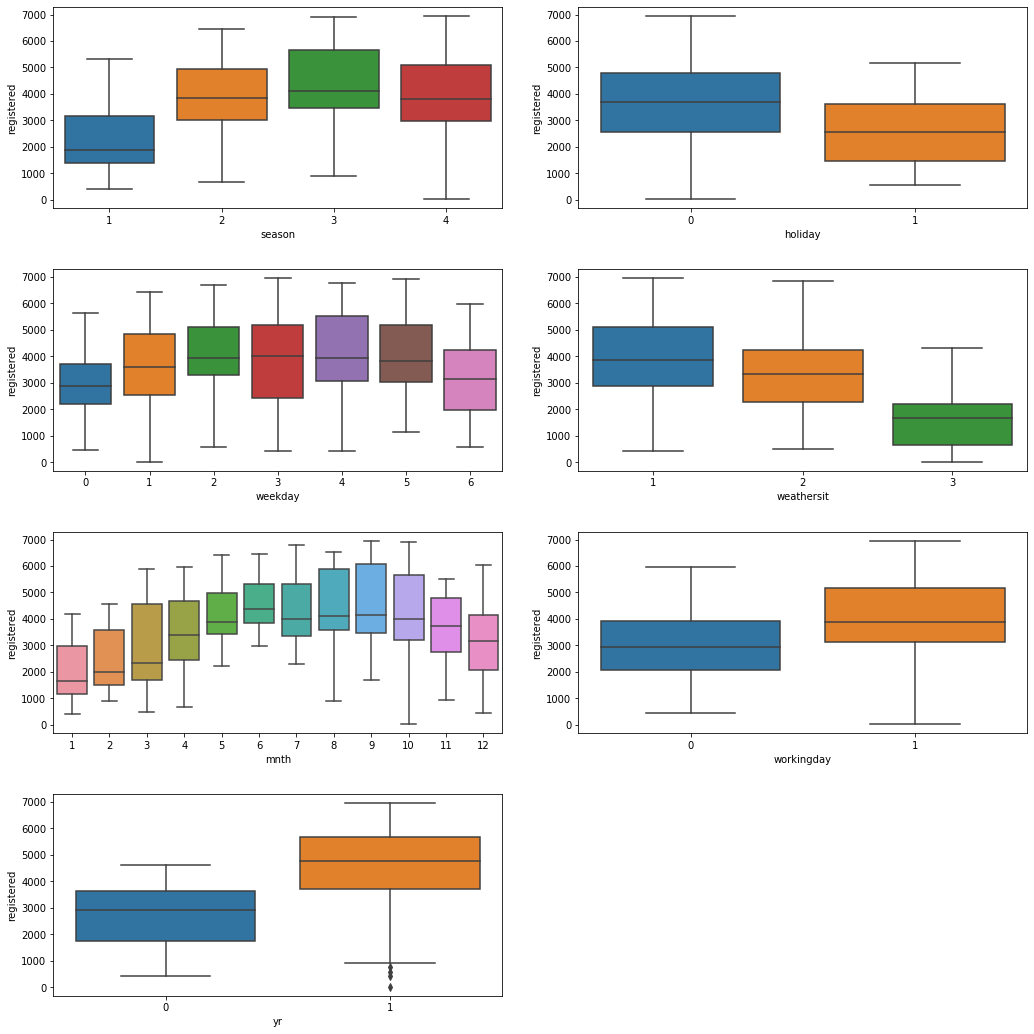

In [10]:
#categorical features vs registered
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['registered',col]],x=col,y='registered',ax=ax)
    
fig.tight_layout(pad=3.0)

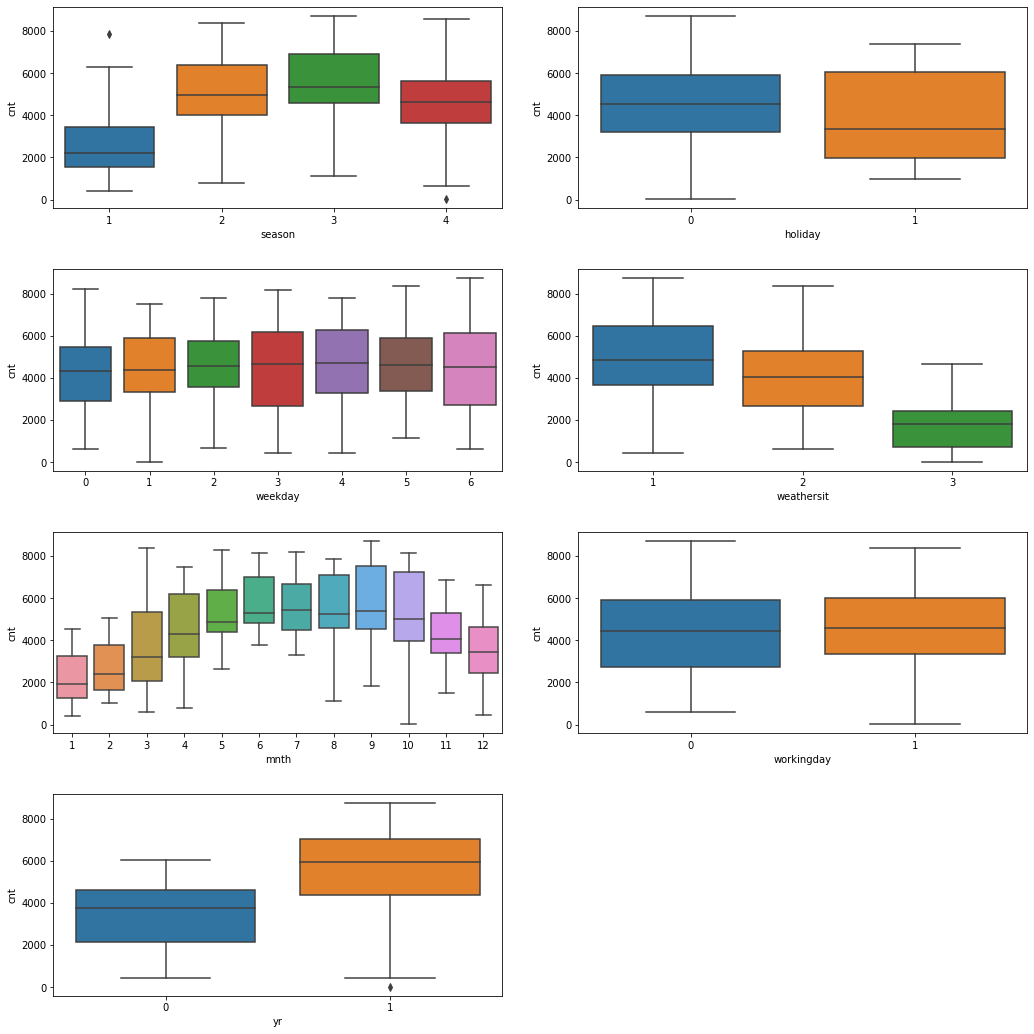

In [11]:
#categorical features vs cnt
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['cnt',col]],x=col,y='cnt',ax=ax)
    
fig.tight_layout(pad=3.0)

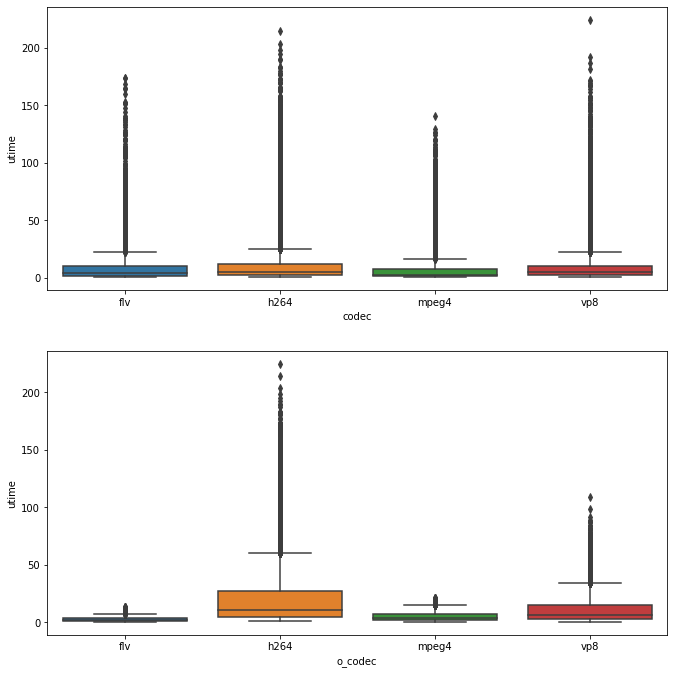

In [12]:
#categorical features vs utime

categorical_features_videos = ['codec','o_codec']

fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)
axes_flatten = axes.flatten()

fig.set_figheight(10)
fig.set_figwidth(10)
for ax,col in zip(axes_flatten,categorical_features_videos):
    sns.boxplot(data=videos[['utime',col]],x=col,y='utime',ax=ax)
    
fig.tight_layout(pad=3.0)

## Q4

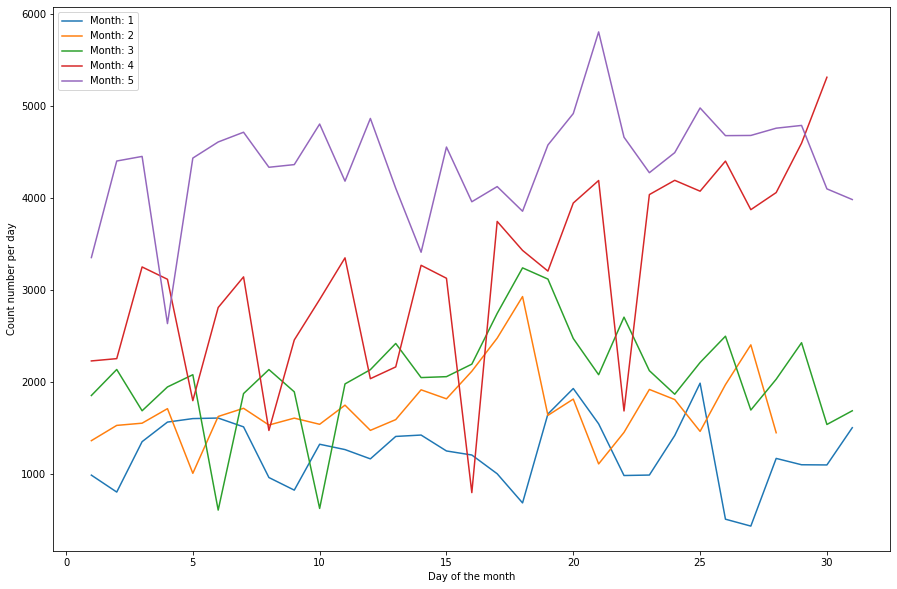

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
for i in range(1,6):
    get = rides.loc[(rides['mnth']==i) & (rides['yr']==0)]['cnt']
    ax.plot(np.arange(1,len(get)+1),get, label='Month: ' + str(i))

ax.set(xlabel='Day of the month', ylabel='Count number per day')
    
ax.legend()
plt.show()

## Q5

Mean transcoding time = 9.996 seconds
Median transcoding time = 4.408 seconds


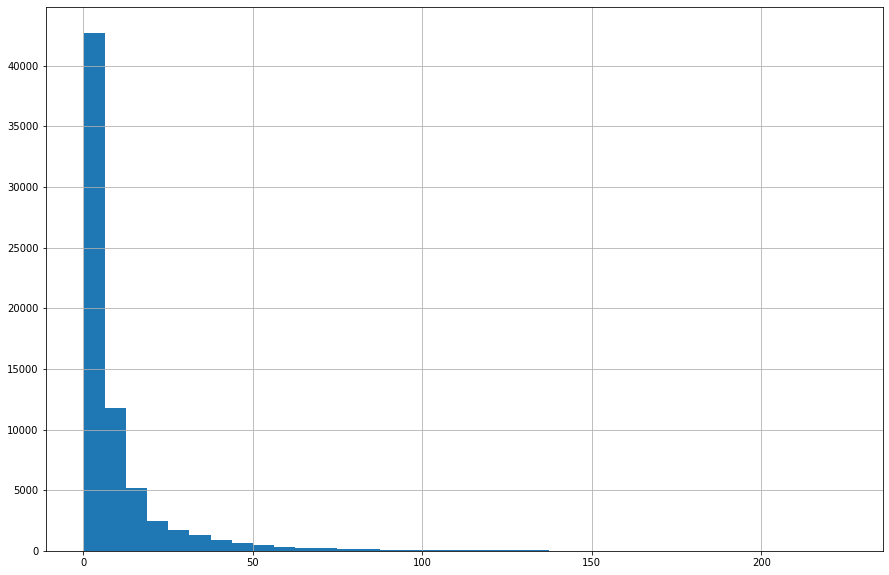

In [14]:
hist = videos['utime'].hist(bins=36,figsize=(15,10))
trns_mean = np.mean(videos['utime'])
trns_median = np.median(videos['utime'])

print('Mean transcoding time = {0:.3f} seconds'.format(trns_mean))
print('Median transcoding time = {0:.3f} seconds'.format(trns_median))

The transcoding time is positively skewed distribution as mean > median.

## Q6

Solution: The scalar encoding can be used where the categorical features have a natural ordering of values. For example in the categorical feature of 'Quality' with values {Poor, Fair, Typical, Good, Excellent}, using scalar encoding with integers from 1 through 5 also retains the information of how good the quality is in terms of magnitude of the number. Machine learning algorithms may be able to understand and harness this relationship. While, by using the one-hot encoding we lose the information of the natural ordering of values. In contrast, using the scalar encoding for categorical variables where no such ordinal relationship exists may result in poor performance or unexpected results. Thus, in such cases it is better to use one hot encoding which does not assume any such ordinal relationship.

Preprocessing the categorical data

In [15]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [16]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
categorical_rides = ['holiday','workingday','weathersit']
rides_encode = pd.get_dummies(data = rides, prefix = None, prefix_sep='_',columns = categorical_rides, drop_first=False)

In [18]:
rides_encode.head()

,instant,dteday,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,1,0,0,1,0
1,2,2011-01-02,1,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,1,0,0,1,0
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,1,1,0,0
3,4,2011-01-04,1,0,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,1,1,0,0
4,5,2011-01-05,1,0,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,1,1,0,0


In [19]:
ridesStandard = rides_encode.drop(columns='dteday', inplace=False)

standard_columns_rides = ['instant','season','yr','mnth','weekday','temp','atemp','hum','windspeed']
standard_scaler = preprocessing.StandardScaler()
ridesStandard[standard_columns_rides] = standard_scaler.fit_transform(ridesStandard[standard_columns_rides])

In [20]:
ridesStandard.head()

,instant,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,-1.729683,-1.348213,-1.001369,-1.600161,1.498809,-0.826662,-0.679946,1.250171,-0.387892,331,654,985,1,0,1,0,0,1,0
1,-1.724944,-1.348213,-1.001369,-1.600161,-1.496077,-0.721095,-0.740652,0.479113,0.749602,131,670,801,1,0,1,0,0,1,0
2,-1.720205,-1.348213,-1.001369,-1.600161,-0.996930,-1.634657,-1.749767,-1.339274,0.746632,120,1229,1349,1,0,0,1,1,0,0
3,-1.715466,-1.348213,-1.001369,-1.600161,-0.497782,-1.614780,-1.610270,-0.263182,-0.389829,108,1454,1562,1,0,0,1,1,0,0
4,-1.710728,-1.348213,-1.001369,-1.600161,0.001366,-1.467414,-1.504971,-1.341494,-0.046307,82,1518,1600,1,0,0,1,1,0,0


Text(0.5, 1.0, 'Mutual Information between each feature and total count')

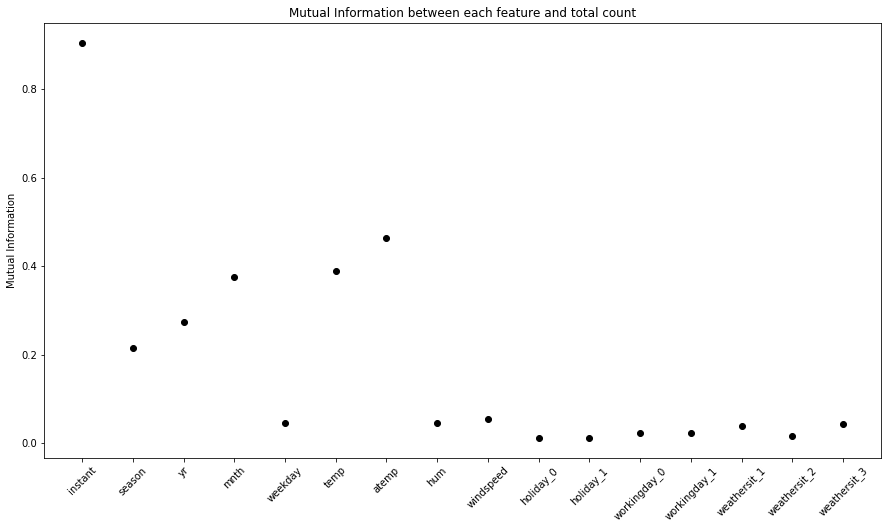

In [21]:
X_rides = ridesStandard.drop(columns=['casual','registered','cnt'])
Y_rides = ridesStandard['cnt']

mi_rides = mutual_info_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,mi_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and total count')

Text(0.5, 1.0, 'F scores between each feature and total count')

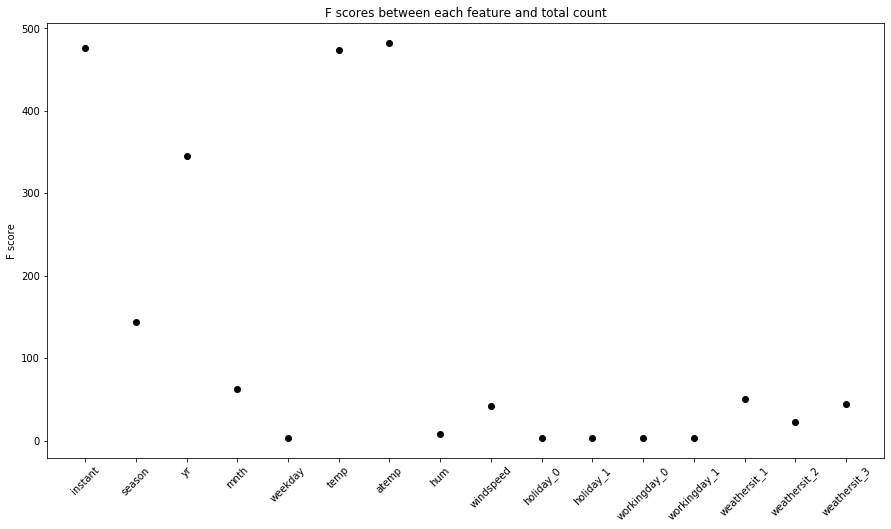

In [22]:
fval_rides, _ = f_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,fval_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and total count')

In [23]:
categorical_videos = ['codec','o_codec']
videos_encode = pd.get_dummies(data = videos, prefix = None, prefix_sep='_',columns = categorical_videos, drop_first=False)

In [24]:
videos_encode.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,22508,0.612,0,0,1,0,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,25164,0.980,0,0,1,0,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,29228,1.216,0,0,1,0,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,34316,1.692,0,0,1,0,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,58528,3.456,0,0,1,0,0,0,1,0


In [25]:
videosStandard = videos_encode.drop(columns='id', inplace=False)

standard_columns_videos = videosStandard.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime','umem'])
standard_scaler = preprocessing.StandardScaler()
videosStandard[standard_columns_videos] = standard_scaler.fit_transform(videosStandard[standard_columns_videos])

In [26]:
videosStandard.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,22508,0.612,0,0,1,0,0,0,1,0
1,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,25164,0.980,0,0,1,0,0,0,1,0
2,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,29228,1.216,0,0,1,0,0,0,1,0
3,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,34316,1.692,0,0,1,0,0,0,1,0
4,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,58528,3.456,0,0,1,0,0,0,1,0


In [27]:
X_videos = videosStandard.drop(columns=['utime','umem'])
Y_videos = videosStandard['utime']

X_videos_columns = X_videos.columns

In [28]:
#Feature Selection

rides_features_drop = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt']
X_ridesFinal = ridesStandard.drop(columns=rides_features_drop)
y_ridesFinal = ridesStandard['cnt']

In [29]:
X_ridesFinal.head()

,instant,season,yr,mnth,temp,atemp
0,-1.729683,-1.348213,-1.001369,-1.600161,-0.826662,-0.679946
1,-1.724944,-1.348213,-1.001369,-1.600161,-0.721095,-0.740652
2,-1.720205,-1.348213,-1.001369,-1.600161,-1.634657,-1.749767
3,-1.715466,-1.348213,-1.001369,-1.600161,-1.614780,-1.610270
4,-1.710728,-1.348213,-1.001369,-1.600161,-1.467414,-1.504971


In [30]:
videos_features_drop = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','umem']
X_videosFinal = videosStandard.drop(columns=videos_features_drop)
y_videosFinal = videosStandard['utime']

In [31]:
X_videosFinal.head()

,duration,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_width,o_height,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-1.026856,-1.138803,0,0,1,0
1,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.790773,-0.834975,0,0,1,0
2,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.528459,-0.455190,0,0,1,0
3,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.266145,-0.075405,0,0,1,0
4,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,0.783112,0.684165,0,0,1,0


Training Test Dataset split

In [32]:
x_train_rides, x_test_rides, y_train_rides, y_test_rides = train_test_split(X_ridesFinal, y_ridesFinal, test_size = 0.33, random_state = 42)

In [33]:
x_train_videos, x_test_videos, y_train_videos, y_test_videos = train_test_split(X_videosFinal, y_videosFinal, test_size = 0.33, random_state = 42)

In [34]:
# Without Feature Scaling Bike Sharing Dataset

rides_features_drop_wfs = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt','dteday']
X_ridesFinal_wfs = rides_encode.drop(columns=rides_features_drop_wfs)
y_ridesFinal_wfs = rides_encode['cnt']

x_train_rides_wfs, x_test_rides_wfs, y_train_rides_wfs, y_test_rides_wfs = train_test_split(X_ridesFinal_wfs, y_ridesFinal_wfs, test_size = 0.33, random_state = 42)

In [35]:
# Without Feature Scaling Video Dataset
videos_features_drop_wfs = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','id','umem']
X_videosFinal_wfs = videos_encode.drop(columns=videos_features_drop_wfs)
y_videosFinal_wfs = videos_encode['utime']

x_train_videos_wfs, x_test_videos_wfs, y_train_videos_wfs, y_test_videos_wfs = train_test_split(X_videosFinal_wfs, y_videosFinal_wfs, test_size = 0.33, random_state = 42)

Neural network section

In [ ]:
#x_train_rides, x_test_rides, y_train_rides, y_test_rides
#x_train_videos, x_test_videos, y_train_videos, y_test_videos
#x_train_rides_wfs, x_test_rides_wfs, y_train_rides_wfs, y_test_rides_wfs
#x_train_videos_wfs, x_test_videos_wfs, y_train_videos_wfs, y_test_videos_wfs
activationTypes = ['identity','logistic','tanh','relu','softmax']
bestRMSE = 1000

for i in np.arange(0,4):
    for hidden1 in range(10,500,20):
        for hidden2 in range(10,hidden1,20):
            clf = MLPRegressor(activation = activationTypes[i], hidden_layer_sizes=(hidden1,hidden2,),max_iter=1000, random_state=1)
            clf.fit(x_train_rides, y_train_rides)
            y_predict = clf.predict(x_test_rides)
            rmse = mean_squared_error(y_true= y_test_rides,y_pred= y_predict, squared = False)
            if rmse < bestRMSE:
                bestRMSE = rmse
                print('RMSE: ', rmse, ' ', hidden1, ' ', hidden2, ' ', activationTypes[i])
        


RMSE:  997.249058053651   30   10   identity
RMSE:  995.490454556034   50   10   identity
RMSE:  994.3561453676385   110   30   identity
RMSE:  993.4040091926639   110   50   identity
RMSE:  993.2556832566396   150   130   identity
RMSE:  992.9162112110023   230   210   identity
RMSE:  992.6846860722006   330   250   identity
RMSE:  992.5228475633991   370   210   identity
RMSE:  992.0753730264287   410   190   identity
